In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
print(f"Target: 'Income'\nUnique Values in Income: {df.Loan_Status.unique()}\nNumber of unique values: {df.Loan_Status.nunique()}")

Target: 'Income'
Unique Values in Income: ['Y' 'N']
Number of unique values: 2


In [5]:
print("Number of unique values in every feature: ")
df.nunique()

Number of unique values in every feature: 


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

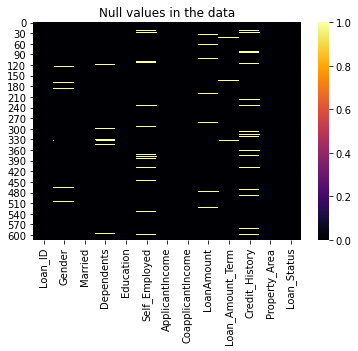

In [8]:
plt.title("Null values in the data", fontsize = 12)
sns.heatmap(df.isnull(), cmap = 'inferno')
plt.show()

In [9]:
print("Datatype of every feature: ")
df.dtypes

Datatype of every feature: 


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [11]:
#We separate categorical and continuous features
cat=[i for i in df.columns if df[i].nunique()<11]
cont=[i for i in df.columns if df[i].nunique()>=11 and i!='Loan_ID']

Y    422
N    192
Name: Loan_Status, dtype: int64

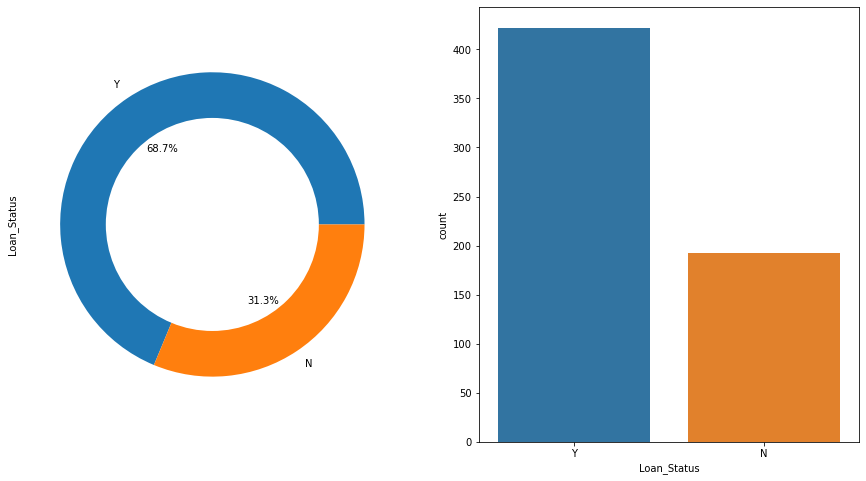

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Loan_Status',data=df)
df['Loan_Status'].value_counts()

Dataset is highly imbalanced as label class do not have eqaul count of categories

Male      489
Female    112
Name: Gender, dtype: int64

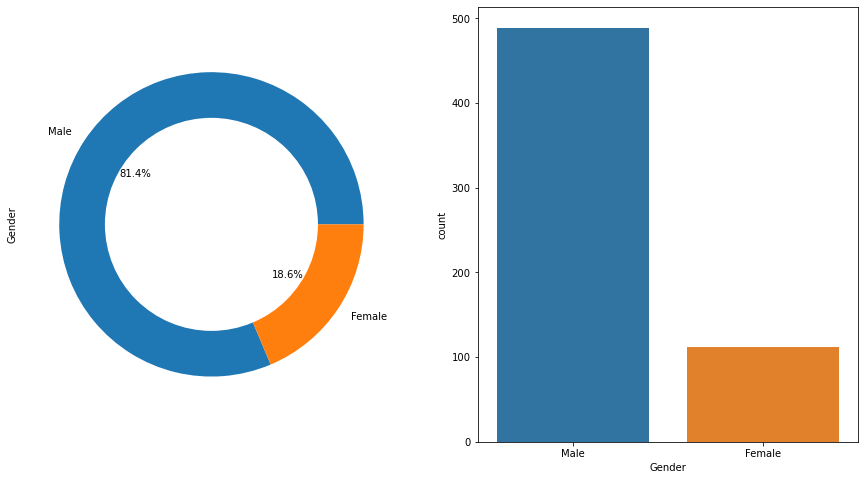

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Gender',data=df)
df['Gender'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

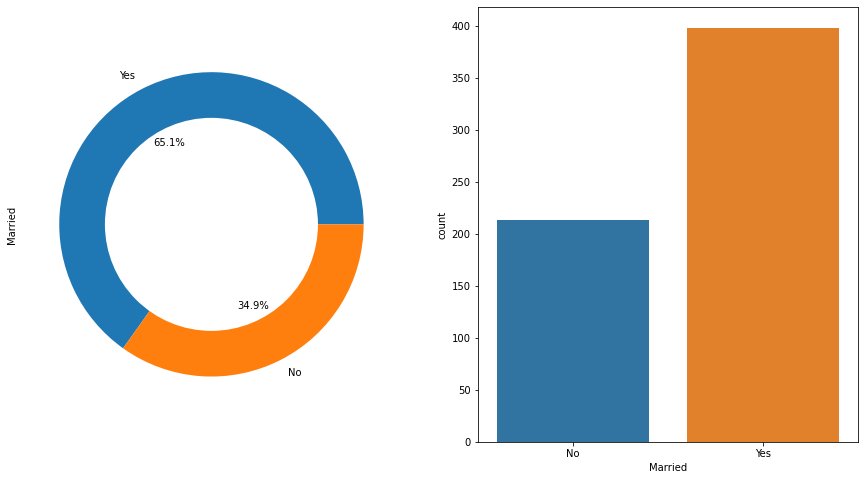

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Married'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Married',data=df)
df['Married'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

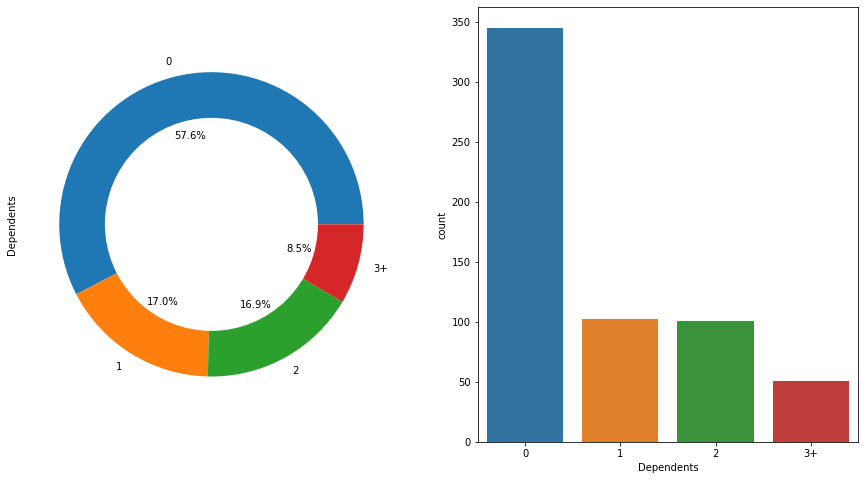

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Dependents',data=df)
df['Dependents'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

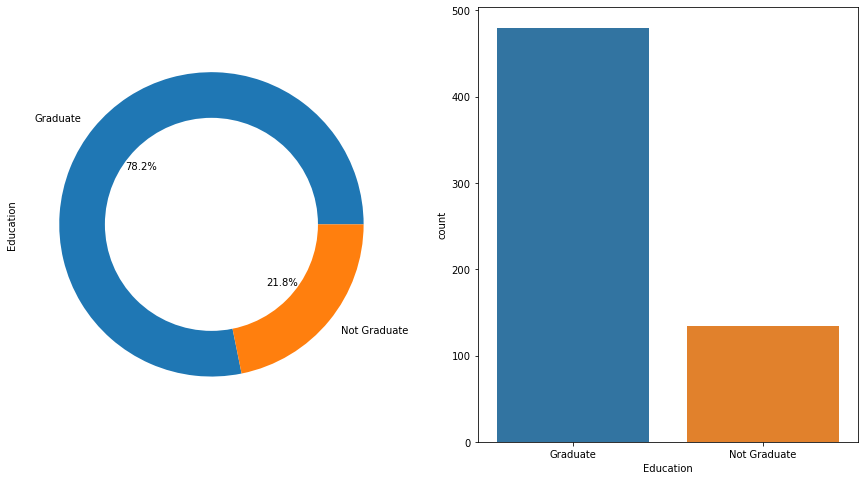

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Education'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Education',data=df)
df['Education'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

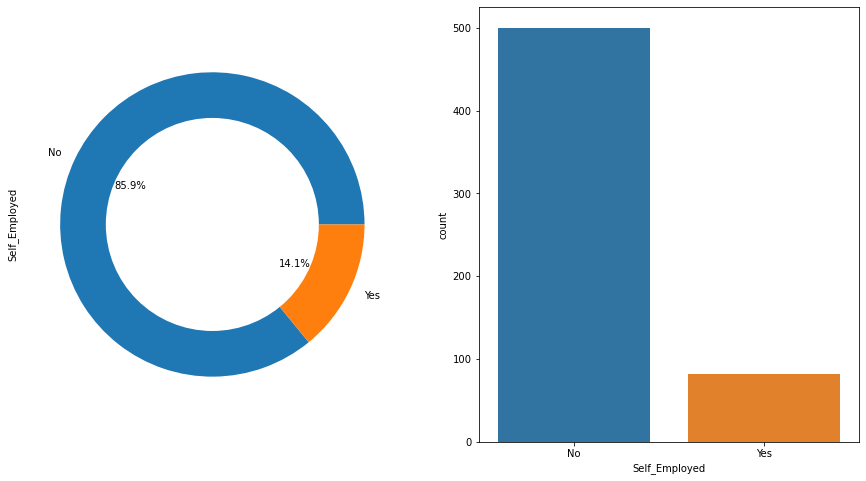

In [36]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Self_Employed',data=df)
df['Self_Employed'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

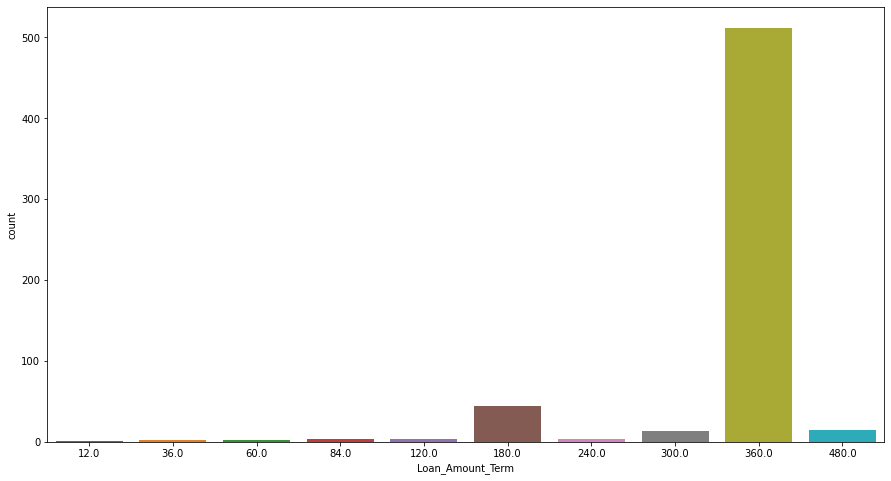

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(x='Loan_Amount_Term',data=df)
df['Loan_Amount_Term'].value_counts()

Most loan applicant take loan amount term of 360 while there are very few who take short loan amount term

1.0    475
0.0     89
Name: Credit_History, dtype: int64

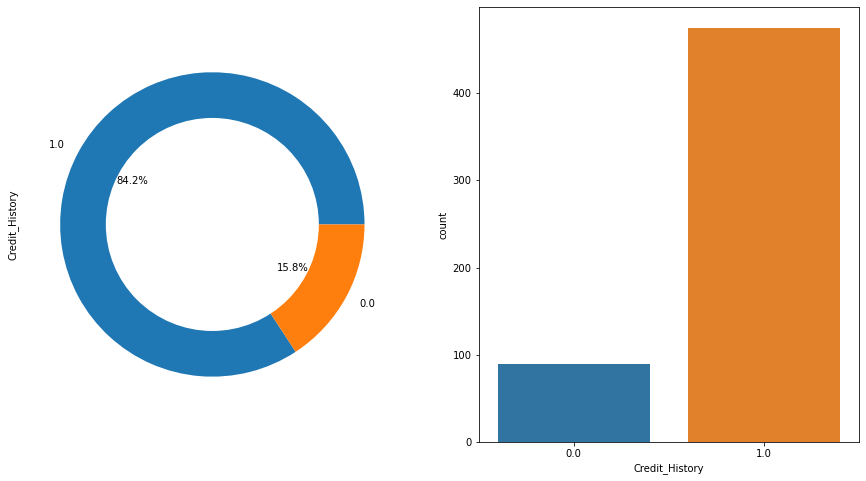

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Credit_History',data=df)
df['Credit_History'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

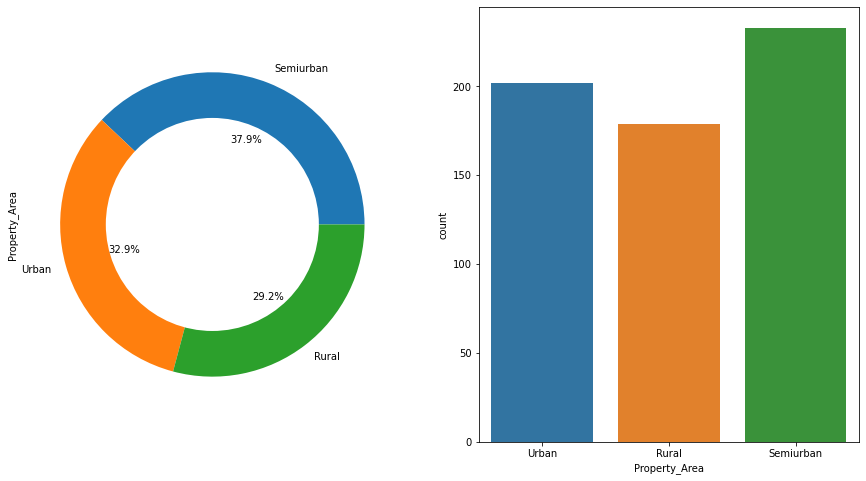

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Property_Area',data=df)
df['Property_Area'].value_counts()

Minimum 150
Maximum 81000


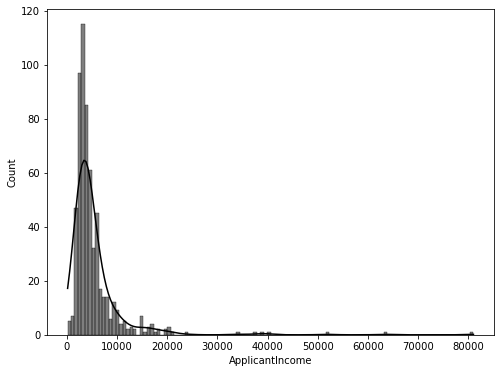

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(df['ApplicantIncome'],kde=True,color='k')
print('Minimum',df['ApplicantIncome'].min())
print('Maximum',df['ApplicantIncome'].max())

Minimum 0.0
Maximum 41667.0


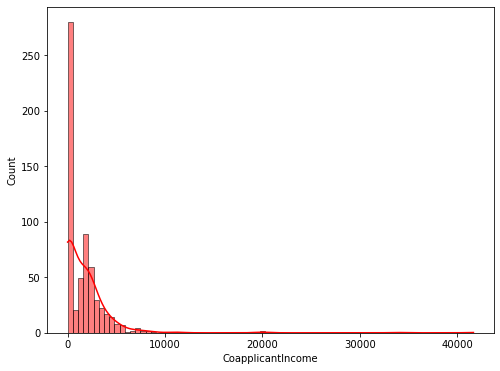

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(df['CoapplicantIncome'],kde=True,color='r')
print('Minimum',df['CoapplicantIncome'].min())
print('Maximum',df['CoapplicantIncome'].max())

Minimum 9.0
Maximum 700.0


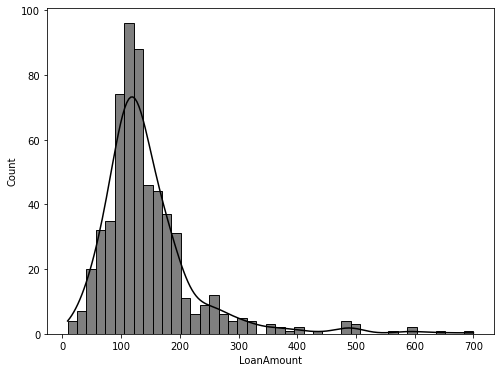

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(df['LoanAmount'],kde=True,color='k')
print('Minimum',df['LoanAmount'].min())
print('Maximum',df['LoanAmount'].max())

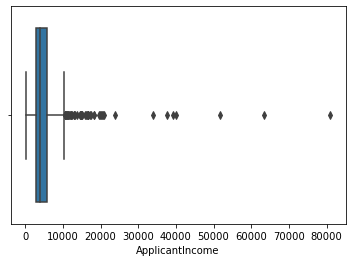

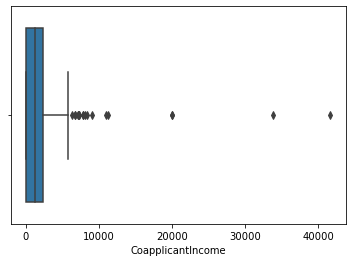

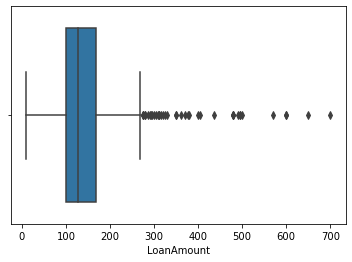

<Figure size 432x288 with 0 Axes>

In [43]:
for i in cont:
    sns.boxplot(df[i])
    plt.figure()

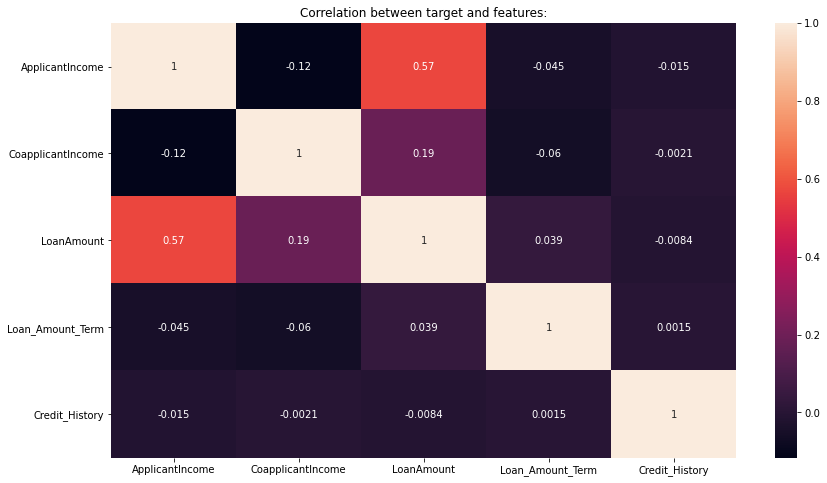

In [44]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(df.corr(), annot = True)
plt.show()

### Feature Engineering


In [45]:
df.drop('Loan_ID',axis=1,inplace=True)

#### Imputing null values


In [46]:
#Imputing null values of categorical features with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [47]:
#Imputing null value of continuos feature LoanAmount with median as high skewness is present in it.
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<AxesSubplot:>

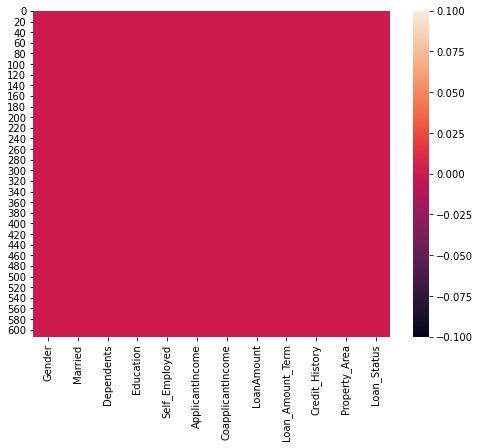

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

There are no more null values in the dataset.

In [49]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [50]:
#We use ordinal encoder to Encode Independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='Loan_Status':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

In [51]:
#We use label encoder to encode label 
df['Loan_Status']=l.fit_transform(df['Loan_Status'])

### Removing Outliers


In [52]:
#Function to choose the right threshold 
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [53]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 6.03%
With threshold 3.2 data loss is 5.37%
With threshold 3.4 data loss is 5.37%
With threshold 3.6 data loss is 4.72%
With threshold 3.8 data loss is 4.72%
With threshold 4.0 data loss is 4.23%
With threshold 4.2 data loss is 3.26%
With threshold 4.4 data loss is 2.77%
With threshold 4.6 data loss is 2.77%
With threshold 4.8 data loss is 2.28%


In [54]:
#We use threshold as 3.6 because data is expensive and we already have less of data.
df=df[(z<3.6).all(axis=1)]

### Removing skewness

In [55]:
for i in cont:
    print(i,df[i].skew())

ApplicantIncome 2.269125322469563
CoapplicantIncome 1.535617215156561
LoanAmount 1.4248952920837


In [56]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

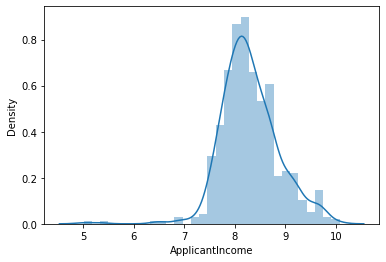

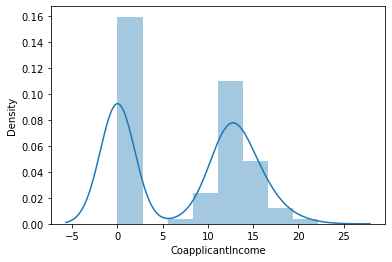

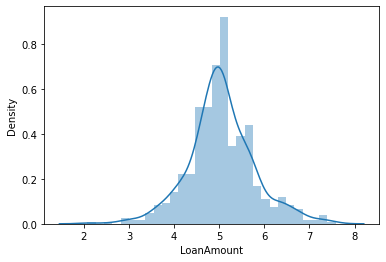

<Figure size 432x288 with 0 Axes>

In [57]:
for i in cont:
    sns.distplot(df[i])
    plt.figure()

In [58]:
#Separating dependent and independent features.
x=df.copy()
x.drop('Loan_Status',axis=1,inplace=True)
y=df['Loan_Status']

#### Handling Imbalanced Data


In [60]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [61]:
x,y=over.fit_resample(x,y)

1    405
0    405
Name: Loan_Status, dtype: int64

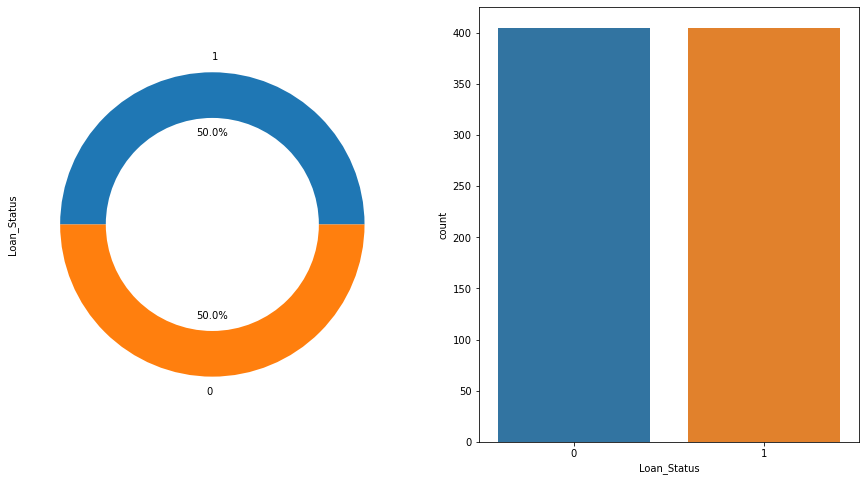

In [62]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

### Scaling the dataset


In [63]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [64]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

### Modeling Phase


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 113, 80.24691358024691


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 67)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### Model Fitting


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [71]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 72.8395061728395
Accuracy Score of Decision Tree Classifier model is 75.7201646090535
Accuracy Score of K-Nearest Neighbour Classifier model is 78.18930041152264
Accuracy Score of Support Vector Classifier model is 74.07407407407408
Accuracy Score of Random Forest model is 84.36213991769547
Accuracy Score of MultinomialNB model is 71.60493827160494
Accuracy Score of ADA Boost model is 81.89300411522635


### Cross Validation:

Cross validating the m,odels to see if they are underfitting or overfitting and to prevent bias. We will compare the mean accuracy scores of the model.

In [73]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x, y, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x, y, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x, y, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x, y, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x, y, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x, y, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x, y, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.75308642 0.65432099 0.74074074 0.74074074 0.74074074 0.77777778
 0.77777778 0.80246914 0.7037037  0.74074074]
Mean of accuracy scores is for Logistic Regression is 74.32098765432099

[0.80246914 0.65432099 0.77777778 0.72839506 0.77777778 0.87654321
 0.81481481 0.85185185 0.87654321 0.82716049]
Mean of accuracy scores is for Decision Tree Classifier is 79.87654320987654

[0.74074074 0.67901235 0.7654321  0.7037037  0.72839506 0.80246914
 0.82716049 0.77777778 0.65432099 0.77777778]
Mean of accuracy scores is for KNN Classifier is 74.5679012345679

[0.69135802 0.62962963 0.7037037  0.71604938 0.7654321  0.7654321
 0.81481481 0.77777778 0.71604938 0.80246914]
Mean of accuracy scores is for SVC Classifier is 73.82716049382717

[0.75308642 0.71604938 0.77777778 0.74074074 0.85185185 0.90123457
 0.9382716  0.91358025 0.92592593 0.92592593]
Mean of accuracy scores is for Random Forest Classifier is 84.44444444444444

[0.65432099 0.65432099 0.72839506 0.67901235 0.74074074 0.7037037
 0.728

Random forest classifier is the best model with highest cross validation mean score and accuracy score. We will use it for the model building.

### Hyperparameter Tuning:

In [74]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8483539416066161
{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 100}


In [75]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 100)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

1.0


### Model Evaluation:


We have build the model after the cross validation and hyper parameter tuning. It is now time to evaluate the model using the classification report, confusion matrix and ROC curve.

Accuracy Score of RFC model is 83.1275720164609
Confusion matrix for RFC Model is
[[ 92  27]
 [ 14 110]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       119
           1       0.80      0.89      0.84       124

    accuracy                           0.83       243
   macro avg       0.84      0.83      0.83       243
weighted avg       0.83      0.83      0.83       243



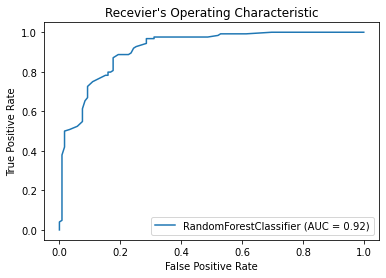

In [76]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

fter the model evaluation , we get the precision and recall for both the target variable as 0.80 and 0.89. The f1- score of the model is 0.84.he ROC curve gave us the AUC score which is 0.92. Model evaluation gives the results that the prediction is very accurate.